 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [6]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [7]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_path,infer_datetime_format=True, parse_dates=True, index_col='Date')
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [10]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_path,infer_datetime_format=True, parse_dates=True, index_col='Date')
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, infer_datetime_format=True, parse_dates=True, index_col='Date')
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [15]:
# Check Data Types
type(sp500_df['Close'])

pandas.core.series.Series

In [16]:
# Fix Data Types
sp500_df.replace({'\$':''}, regex = True, inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [17]:
sp500_df = sp500_df.astype(float)
type(sp500_df['Close'])

pandas.core.series.Series

In [18]:
# Calculate Daily Returns
sp500_df.pct_change()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [19]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [20]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns = {'Close':'SP500 Close'}, inplace = True)
sp500_df.head()
sp500_returns = sp500_df.pct_change()
sp500_returns.head()


,SP500 Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dfs = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis='columns', join='inner')
combined_dfs.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

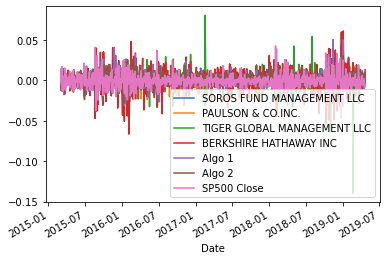

In [22]:
# Plot daily returns of all portfolios
combined_dfs.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

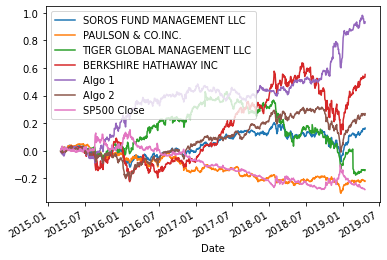

In [23]:
# Calculate cumulative returns of all portfolios
cumaltive_returns = (1 + combined_dfs).cumprod()- 1
cumaltive_returns.tail()
# Plot cumulative returns
cumaltive_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

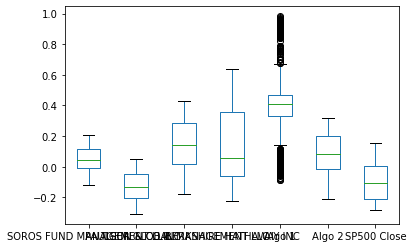

In [24]:
# Box plot to visually show risk
cumaltive_returns.plot(kind='box')

### Calculate Standard Deviations

In [25]:
cumaltive_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123


In [26]:
# Calculate the daily standard deviations of all portfolios
cumaltive_returns.std()

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
Algo 2                         0.131700
SP500 Close                    0.114846
dtype: float64

In [27]:
combined_dfs.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
print('Using daily pct change data the SP500 std is 0.008587')
# Determine which portfolios are riskier than the S&P 500
print("Berkshire Hathaway Inc and Tiger Global Management LLC are riskier than S&P500")

Using daily pct change data the SP500 std is 0.008587
Berkshire Hathaway Inc and Tiger Global Management LLC are riskier than S&P500


### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
combined_dfs.std()*252

SOROS FUND MANAGEMENT LLC      1.989634
PAULSON & CO.INC.              1.769816
TIGER GLOBAL MANAGEMENT LLC    2.745280
BERKSHIRE HATHAWAY INC         3.255492
Algo 1                         1.920291
Algo 2                         2.102253
SP500 Close                    2.163896
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

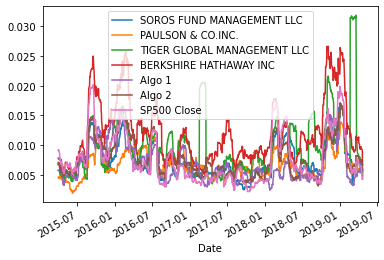

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_rolling_21_std = combined_dfs.rolling(window=21).std()
# Plot the rolling standard deviation
combined_dfs.rolling(window=21).std().plot()


### Calculate and plot the correlation

<AxesSubplot:>

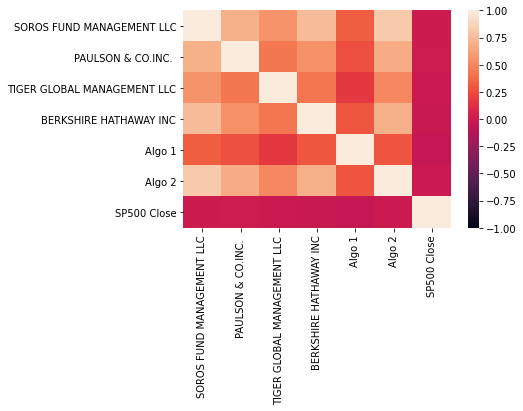

In [31]:
# Calculate the correlation
combined_corr = combined_dfs.corr()
# Display de correlation matrix
sns.heatmap(combined_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

-4.39381794976078e-06
9.185941770085173e-05
-0.047831981300704894


<AxesSubplot:>

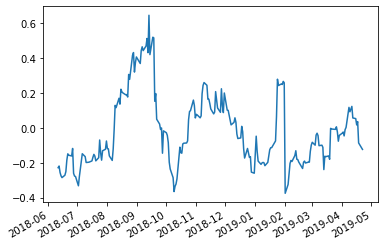

In [90]:
# Calculate covariance of a single portfolio
algo1_cov = combined_dfs['Algo 1'].cov(combined_dfs['SP500 Close'])
print(algo1_cov)
# Calculate variance of S&P 500 

sp500_var = combined_dfs['SP500 Close'].var()


print (sp500_var)
# Computing beta
algo1_beta = algo1_cov / sp500_var

print(algo1_beta)
# Plot beta trend

rolling_algo1_cov = combined_dfs['Algo 1'].rolling(window=21).cov(combined_dfs['SP500 Close'])
rolling_sp500_var = combined_dfs['SP500 Close'].rolling(window=21).var()

rolling_beta = rolling_algo1_cov / rolling_sp500_var

rolling_beta.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [91]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = combined_dfs.ewm(halflife=21).std()
portfolio_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Sample
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,0.003335,0.000694,0.001856,0.002917,0.000394,0.000957,0.005496,0.007233
2018-05-15,0.002516,0.001204,0.002914,0.007601,0.001070,0.001399,0.005656,0.009831
2018-05-16,0.005668,0.003402,0.003749,0.008203,0.001478,0.001939,0.004581,0.007993
2018-05-17,0.005048,0.002958,0.004715,0.007081,0.003179,0.002527,0.004035,0.007318


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Annualized Sharpe Ratios
sharpe_df = (combined_dfs.mean() * 252) / (combined_dfs.std() * np.sqrt(252)) 
sharpe_df

SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
SP500 Close                   -0.432942
Sample                        -0.614330
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

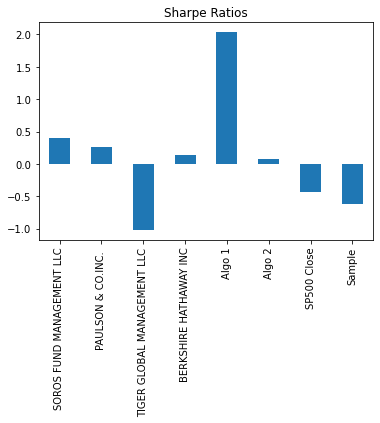

In [93]:
# Visualize the sharpe ratios as a bar plot
sharpe_df.plot(kind='bar', title='Sharpe Ratios')

<AxesSubplot:xlabel='Date'>

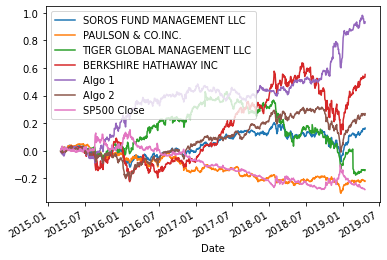

In [38]:
cumaltive_returns.plot()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [39]:
print('The Portfolio Algo 1 out performs the whales and S&P 500 portfolios. Algo 2 out performs the S&P 500 & all of the whales portfolios except Berkshire Hathaway Inc.')

The Portfolio Algo 1 out performs the whales and S&P 500 portfolios. Algo 2 out performs the S&P 500 & all of the whales portfolios except Berkshire Hathaway Inc.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [48]:
# Reading data from 1st stock
google_path = Path('Resources/goog_historical.csv')
google_returns_df = pd.read_csv(google_path,infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
google_returns_df.rename(columns = {'NOCP':'GOOG Close'}, inplace = True)
google_returns_df.drop('Symbol', axis=1, inplace = True)

google_returns_df.head()

,GOOG Close
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [49]:
# Reading data from 2nd stock
apple_path = Path('Resources/aapl_historical.csv')
apple_returns_df = pd.read_csv(apple_path,infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
apple_returns_df.rename(columns = {'NOCP':'AAPL Close'}, inplace = True)
apple_returns_df.drop('Symbol', axis=1, inplace = True)
apple_returns_df.head()

,AAPL Close
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [50]:
# Reading data from 3rd stock
costco_path = Path('Resources/cost_historical.csv')
costco_returns_df = pd.read_csv(costco_path,infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
costco_returns_df.rename(columns = {'NOCP':'COST Close'}, inplace = True)
costco_returns_df.drop('Symbol', axis=1, inplace = True)
costco_returns_df.head()

,COST Close
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [51]:
# Combine all stocks in a single DataFrame
sample_df = pd.concat([costco_returns_df, apple_returns_df, google_returns_df], axis='columns', join='inner')
sample_df.head()

,COST Close,AAPL Close,GOOG Close
Trade DATE,,,
2019-05-09,243.47,200.72,1162.38
2019-05-08,241.34,202.90,1166.27
2019-05-07,240.18,202.86,1174.10
2019-05-06,244.23,208.48,1189.39
2019-05-03,244.62,211.75,1185.40


In [52]:
# Reset Date index
sample_df.head()

,COST Close,AAPL Close,GOOG Close
Trade DATE,,,
2019-05-09,243.47,200.72,1162.38
2019-05-08,241.34,202.90,1166.27
2019-05-07,240.18,202.86,1174.10
2019-05-06,244.23,208.48,1189.39
2019-05-03,244.62,211.75,1185.40


In [54]:
# Reorganize portfolio data by having a column per symbol
sample_df.head()

,COST Close,AAPL Close,GOOG Close
Trade DATE,,,
2019-05-09,243.47,200.72,1162.38
2019-05-08,241.34,202.90,1166.27
2019-05-07,240.18,202.86,1174.10
2019-05-06,244.23,208.48,1189.39
2019-05-03,244.62,211.75,1185.40


In [55]:
# Calculate daily returns
sample_daily_returns_df = sample_df.pct_change()
# Drop NAs
sample_daily_returns_df.dropna(inplace = True)
# Display sample data
sample_daily_returns_df.head()

,COST Close,AAPL Close,GOOG Close
Trade DATE,,,
2019-05-08,-0.008749,0.010861,0.003347
2019-05-07,-0.004806,-0.000197,0.006714
2019-05-06,0.016862,0.027704,0.013023
2019-05-03,0.001597,0.015685,-0.003355
2019-05-02,-0.007890,-0.012279,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Trade DATE'>

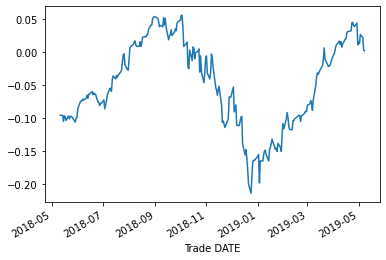

In [59]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
portfolio_sample_returns = sample_daily_returns_df.dot(weights)
portfolio_sample_returns.head()

cumaltive_sample_returns = (1 + portfolio_sample_returns).cumprod()- 1
# Display sample data
cumaltive_sample_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [81]:
# Join your returns DataFrame to the original returns DataFrame
combined_dfs = pd.concat([whale_returns_df, algo_returns_df, sp500_returns, portfolio_sample_returns], axis='columns', join='inner')
combined_dfs.rename(index = {None:'Date'}, columns = {0:'Sample'}, inplace = True)
combined_dfs.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Sample
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112


In [85]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_dfs.dropna()
combined_dfs.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 Close                    1
Sample                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [86]:
# Calculate the annualized `std`
combined_dfs.std()*252

SOROS FUND MANAGEMENT LLC      2.324896
PAULSON & CO.INC.              1.849201
TIGER GLOBAL MANAGEMENT LLC    3.683983
BERKSHIRE HATHAWAY INC         3.915795
Algo 1                         2.118032
Algo 2                         2.210713
SP500 Close                    2.415252
Sample                         3.376304
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

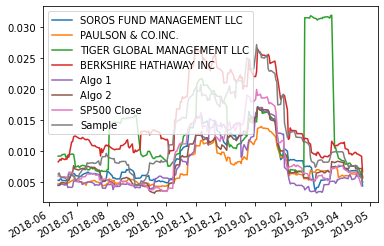

In [87]:
# Calculate rolling standard deviation
portfolio_rolling_21_std = combined_dfs.rolling(window=21).std()
# Plot the rolling standard deviation
combined_dfs.rolling(window=21).std().plot()


### Calculate and plot the correlation

<AxesSubplot:>

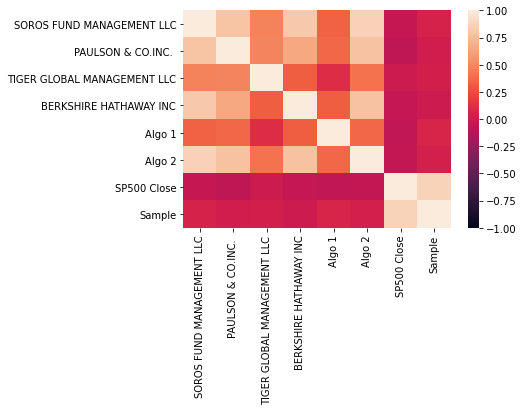

In [88]:
# Calculate and plot the correlation
combined_corr = combined_dfs.corr()
sns.heatmap(combined_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

0.00011195105924746918
0.00017950725878394133
9.185941770085173e-05
1.2187216297413037


<AxesSubplot:>

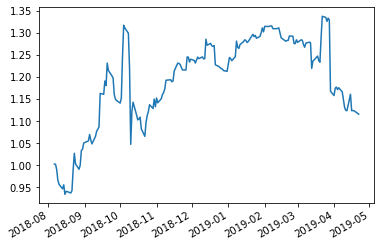

In [89]:
# Calculate and plot Beta

sample_cov = combined_dfs['Sample'].cov(combined_dfs['SP500 Close'])
print(sample_cov)

sample_var = combined_dfs['Sample'].var()

sp500_var = combined_dfs['SP500 Close'].var()

print(sample_var)
print (sp500_var)
# Computing beta
sample_beta = sample_cov / sp500_var

print(sample_beta)
# Plot beta trend

rolling_sample_cov = combined_dfs['Sample'].rolling(window=60).cov(combined_dfs['SP500 Close'])
rolling_sp500_var = combined_dfs['SP500 Close'].rolling(window=60).var()

sample_rolling_beta = rolling_sample_cov / rolling_sp500_var

sample_rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [96]:
# Calculate Annualzied Sharpe Ratios
sharpe_df = (combined_dfs.mean() * 252) / (combined_dfs.std() * np.sqrt(252)) 
sharpe_df

SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
SP500 Close                   -0.432942
Sample                        -0.614330
dtype: float64

<AxesSubplot:>

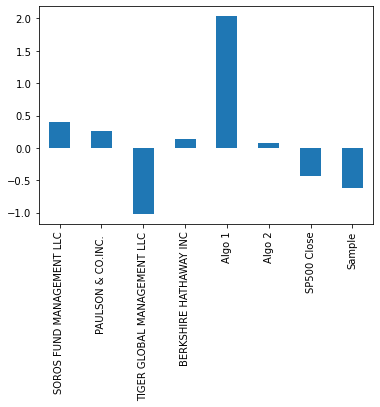

In [97]:
# Visualize the sharpe ratios as a bar plot
sharpe_df.plot(kind='bar')

<AxesSubplot:>

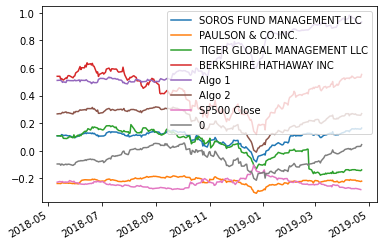

In [100]:
total_cumaltive_returns = pd.concat([cumaltive_returns, cumaltive_sample_returns], axis='columns', join='inner')
total_cumaltive_returns.plot()

### How does your portfolio do?

Write your answer here!

In [101]:
print('My sample portfolio does better slightly better than the S&P 500 in regards to cumaltive returns but has a lower sharpe ratio, higher standard deviation making it a more risky pick for returns it offers.')

My sample portfolio does better slightly better than the S&P 500 in regards to cumaltive returns but has a lower sharpe ratio, higher standard deviation making it a more risky pick for returns it offers.
